<h1 style="text-align:center"> Atividade Segmentação </h1>

<h3 style=" font-weight: bold;"> Bibliotecas </h3>

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
from skimage.io import imread
from utils.image import Image

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
os.chdir('/content/drive/MyDrive/Sistemas_de_Informação/Topicos em visão computacional/github/atividade_segmentacao/')

<h2 style="text-align:center;">Questão 01</h2>

<p> Utilizando a base de imagens “ultrassound.zip” disponibilizada no SIGAA, realize a segmentação das imagens das seguintes formas: </p>

<p> I. Aplique o algoritmo K-means utilizando os pixels como pesos; </p>

<p>II. Implemente duas segmentações utilizando os algoritmos de binarização local e global (Niblack e Otsu, respectivamente); </p>

<p> III. Aplique outro algoritmo de agrupamento que utilize também a posição espacial dos pixels como peso; </p>

In [8]:
path = 'ultrassound/cropped/'
path_mask = 'ultrassound/masks/'
path_result = 'resultados/'
imgs = sorted(os.listdir(path))
masks = sorted(os.listdir(path_mask))
imgs_obj = [Image(f'{path}{img}') for img in imgs]

In [9]:
len(imgs), len(masks)

(206, 206)

<h3 style="text-align:center;">K-means</h3>

In [10]:
def kmeans(imgs, n_clusters, path, result_path):
    for img in tqdm_notebook(imgs):
        img_name = f'{result_path}{img.name}'
        img.filtro_media()
        img.segmentar('kmeans', n_clusters)
        #img.save(img_name, img.img_segmentada['kmeans'])


In [11]:
kmeans(imgs_obj, 2, path, path_result+'kmeans/')

  0%|          | 0/206 [00:00<?, ?it/s]

In [12]:
amostra = Image(path+imgs[0])
amostra.filtro_media()
amostra.segmentar('kmeans', 2)

Text(0.5, 1.0, 'Resultado')

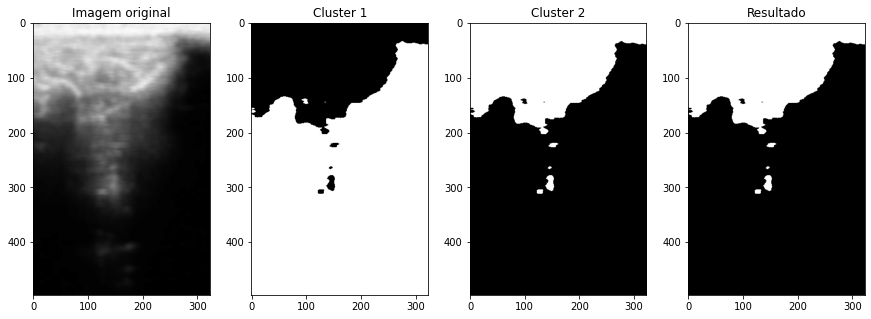

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(amostra.img_media, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(amostra.img_segmentada['kmeans']==0, cmap='gray')
ax[1].set_title('Cluster 1')
ax[2].imshow(amostra.img_segmentada['kmeans']==1, cmap='gray')
ax[2].set_title('Cluster 2')
ax[3].imshow(amostra.img_segmentada['kmeans'], cmap='gray')
ax[3].set_title('Resultado')

<h3 style="text-align:center;">Niblack e Otsu</h3>

In [14]:
def niblack(imgs, path, result_path):
    for img in tqdm_notebook(imgs):
        img_name = f'{result_path}{img.name}'
        img.filtro_media()
        img.segmentar('niblack')
        #img.save(img_name, img.img_segmentada['niblack'])


In [15]:
def otsu(imgs, path, result_path):
    for img in tqdm_notebook(imgs):
        img_name = f'{result_path}{img.name}'
        img.filtro_media()
        img.segmentar('otsu')
        #img.save(img_name, img.img_segmentada['otsu'])


In [16]:
niblack(imgs_obj, path, path_result+'niblack/')

  0%|          | 0/206 [00:00<?, ?it/s]

In [17]:
otsu(imgs_obj, path, path_result+'otsu/')

  0%|          | 0/206 [00:00<?, ?it/s]

In [18]:
amostra.segmentar('niblack')
amostra.segmentar('otsu')

Text(0.5, 1.0, 'Otsu')

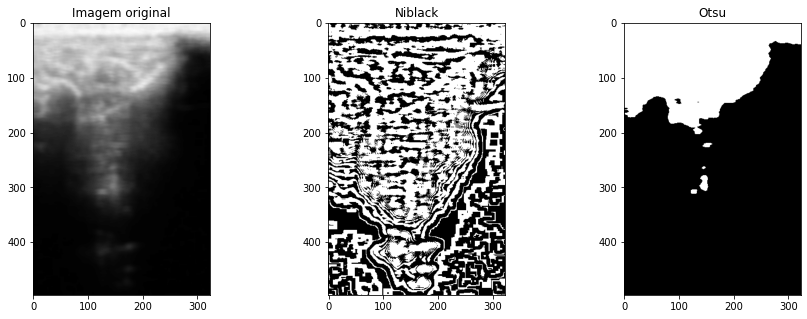

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(amostra.img_media, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(amostra.img_segmentada['niblack'], cmap='gray')
ax[1].set_title('Niblack')
ax[2].imshow(amostra.img_segmentada['otsu'], cmap='gray')
ax[2].set_title('Otsu')

<h2 style="text-align:center;"> Agglomerative Clustering</h2>

In [ ]:
def agglomerative(imgs, path, result_path):
    for img in tqdm_notebook(imgs):
        img_name = f'{result_path}{img.name}'
        img.filtro_media()
        img.segmentar('agglomerative')
        #img.save(img_name, img.img_segmentada['agglomerative'])


In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(amostra.img_media, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(amostra.img_segmentada['agglomerative']==0, cmap='gray')
ax[1].set_title('Cluster 1')
ax[2].imshow(amostra.img_segmentada['agglomerative']==1, cmap='gray')
ax[2].set_title('Cluster 2')
ax[3].imshow(amostra.img_segmentada['agglomerative'], cmap='gray')
ax[3].set_title('Resultado')

<h2 style="text-align:center;">Questão 02</h2>

Crie um método para escolher o foreground e o background automaticamente

In [20]:
amostra.clusters()

Text(0.5, 1.0, 'Background')

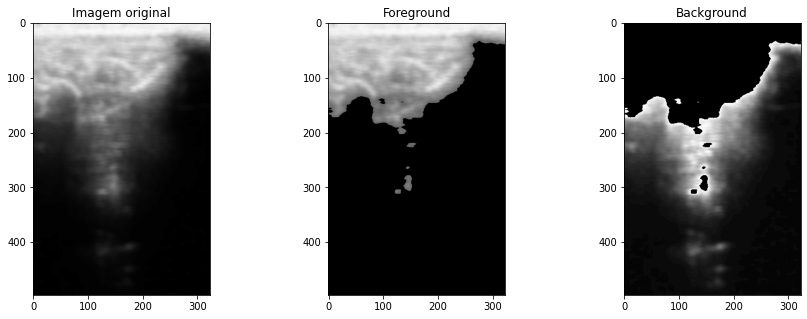

In [21]:
plt, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(amostra.img_media, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(amostra.foreground, cmap='gray')
ax[1].set_title('Foreground')
ax[2].imshow(amostra.background, cmap='gray')
ax[2].set_title('Background')

Questão 03

In [22]:
acuracia = {'kmeans': [], 'niblack': [], 'otsu': [], 'agglomerative': []}
kappa = {'kmeans': [], 'niblack': [], 'otsu': [], 'agglomerative': []}
jacard = {'kmeans': [], 'niblack': [], 'otsu': [], 'agglomerative': []}
def run(imgs, masks, path_mask):
    for img, mask in tqdm_notebook(zip(imgs, masks), total=len(imgs)):
        img.load_mask(f'{path_mask}{img.name}')
        img.redimensionar_mask()
        img.calcular_metricas(img, mask)

In [23]:
run(imgs_obj, masks, path_mask)

  0%|          | 0/206 [00:00<?, ?it/s]

In [24]:
amostra.load_mask(f'{path_mask}{imgs[0]}')
amostra.calcular_metricas()

Accuracy: 0.7219664737651917
Kappa: 0.3066137459067507
Jaccard: 0.5649041742215983
